In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# might be different bepending on your file structure in drive
%cd "/content/drive/MyDrive/Colab Notebooks/Spring22/decoupled-style-descriptors-eb"
# !pip install virtualenv
# !virtualenv venv
# !source ./venv/bin/activate
# !pip install -r requirements.txt 
# !pip install opensimplex

/content/drive/MyDrive/Colab Notebooks/Spring22/decoupled-style-descriptors-eb


In [ ]:
import os
import torch
import pickle
import argparse
import numpy as np
from helper import *
from PIL import Image, ImageDraw
import torch.nn as nn
import torch.optim as optim
from DataLoader import DataLoader
from config.GlobalVariables import *
from SynthesisNetwork import SynthesisNetwork

In [ ]:
# TODO: automate this lmao
# writer 120 "hello" W_vector
loaded_W_vectors = [torch.tensor([[[ 4.7599e-04], [ 1.2270e-03], [ 1.2869e-03], [ 1.2686e-03], [ 4.1972e-04], [-4.4104e-04], [-1.2748e-04], [ 4.8344e-04], [ 2.3042e-04], [-7.2922e-04], [-1.0499e-03], [ 6.4414e-05], [-1.8870e-04], [ 4.0438e-04], [-5.3591e-04], [-1.3955e-05], [-2.3319e-04], [-4.4361e-04], [ 1.0778e-03], [-2.5553e-04], [-1.2836e-05], [-6.0726e-04], [ 2.2947e-04], [ 1.3625e-05], [-1.1825e-04], [ 4.2677e-04], [ 5.4603e-04], [-5.4927e-05], [ 8.7365e-04], [ 9.8572e-06], [ 8.4592e-04], [ 3.7935e-04], [-1.3658e-03], [ 1.5064e-04], [-2.0852e-04], [ 1.2584e-03], [ 3.3988e-04], [-3.3138e-04], [ 9.5291e-04], [ 1.4103e-03], [-4.7156e-04], [-2.9935e-04], [ 8.7174e-04], [ 2.1530e-03], [ 1.3283e-03], [-7.0425e-04], [-1.0360e-04], [ 2.6775e-04], [ 8.7394e-04], [-3.1910e-04], [-4.1662e-04], [-9.9308e-05], [ 9.5537e-04], [ 9.5491e-04], [-2.1256e-04], [ 5.9957e-04], [-4.5474e-04], [ 9.1749e-07], [ 3.4202e-04], [-5.1844e-04], [ 8.7480e-05], [ 1.6497e-03], [ 9.3192e-04], [-7.2724e-04], [-8.6537e-04], [ 2.7970e-05], [ 1.6680e-04], [-2.5640e-04], [ 5.3334e-04], [-6.8119e-04], [-1.3756e-03], [ 2.3489e-05], [-1.3579e-03], [-1.0441e-03], [-7.0955e-04], [-8.4312e-04], [-8.9592e-04], [-2.9176e-04], [ 5.6051e-04], [ 1.4588e-03], [-1.3139e-03], [-1.2857e-04], [ 1.8861e-04], [ 4.5945e-04], [ 2.1628e-04], [-9.5559e-04], [-8.9787e-04], [-2.8046e-05], [-4.5173e-04], [ 7.6236e-04], [-1.4295e-03], [ 9.5447e-04], [-8.6282e-04], [ 6.1076e-05], [-3.1156e-04], [ 6.0984e-04], [ 8.3971e-04], [ 1.0526e-03], [-1.3592e-03], [-6.1145e-04], [ 7.3965e-04], [ 1.3642e-03], [-1.5271e-03], [-1.5863e-05], [-8.5696e-04], [ 2.4603e-05], [-1.5692e-03], [ 1.2848e-03], [-8.9661e-04], [ 5.8460e-04], [-1.2584e-04], [-1.6655e-04], [-6.2463e-04], [-4.4705e-04], [-5.1741e-04], [-4.8415e-05], [ 5.4985e-04], [ 9.1088e-04], [ 2.2096e-04], [-4.5053e-04], [ 1.4822e-03], [-5.4235e-04], [-4.2636e-04], [-7.5681e-04], [-3.2758e-04], [ 1.6080e-04], [-1.9098e-05], [ 7.5620e-06], [ 6.3073e-04], [-7.9906e-05], [ 3.5631e-04], [-1.0008e-03], [ 8.5105e-04], [-3.3733e-04], [ 3.5820e-04], [ 3.3578e-05], [-1.0572e-03], [-1.7095e-03], [ 5.3357e-05], [-7.0794e-04], [ 7.4329e-04], [ 5.8934e-04], [-9.1262e-04], [-2.0609e-04], [-9.1574e-06], [ 5.2542e-04], [-8.5855e-04], [ 9.6590e-04], [-1.0715e-03], [ 1.8541e-03], [ 1.3085e-04], [ 4.8821e-04], [ 5.0496e-04], [ 3.8721e-04], [ 3.4041e-05], [ 3.3893e-04], [ 7.0372e-04], [-6.4132e-06], [-4.5899e-04], [-4.7658e-04], [ 3.3844e-04], [ 2.0638e-04], [-1.3150e-03], [ 1.2190e-03], [-2.4031e-04], [-1.6154e-04], [-1.1057e-03], [-2.5737e-04], [ 1.4656e-03], [-1.9674e-04], [ 7.8953e-04], [-4.2920e-04], [-2.2586e-04], [ 3.8026e-04], [-1.2201e-03], [ 4.5859e-04], [-2.8408e-04], [-1.8571e-04], [ 7.8209e-04], [ 1.0535e-03], [-3.7725e-04], [ 1.0876e-03], [ 3.8554e-04], [-8.7774e-04], [ 9.5772e-04], [ 1.3877e-03], [-9.0704e-04], [-9.3783e-05], [-4.2776e-04], [ 2.0610e-04], [-3.8451e-04], [-5.0418e-04], [-1.5694e-04], [-4.9151e-04], [-6.7581e-04], [ 3.7587e-04], [ 9.4720e-04], [ 5.0251e-04], [ 1.1604e-03], [ 1.2650e-03], [-1.1172e-03], [-1.5359e-03], [ 1.8474e-04], [ 8.5126e-04], [ 1.2324e-03], [ 6.3376e-04], [-3.8988e-04], [-3.9149e-04], [-4.9758e-04], [-6.5874e-04], [ 1.9929e-04], [ 8.8040e-05], [-8.8068e-04], [-2.3378e-04], [ 5.6716e-05], [ 2.9360e-04], [-7.6279e-04], [-9.4373e-05], [-1.1588e-03], [ 8.6783e-04], [ 4.2184e-04], [ 4.3057e-04], [-1.9959e-04], [-1.5445e-04], [-5.5671e-04], [-4.3877e-04], [-5.9867e-04], [-5.5933e-04], [ 2.1544e-04], [ 5.6070e-04], [ 8.5300e-04], [-4.5280e-04], [-1.4166e-04], [ 4.0796e-04], [ 4.1776e-04], [-9.8769e-04], [-8.8309e-04], [ 4.5471e-04], [-3.4374e-04], [-7.1483e-04], [ 4.7599e-04], [ 8.1365e-04], [ 3.7936e-04], [ 6.8850e-04], [-3.9825e-04], [-8.1399e-06], [ 1.1831e-04], [-1.0265e-04], [-6.6608e-04], [-4.7939e-04], [ 2.8663e-04], [ 1.6317e-04], [ 5.8885e-04], [ 2.7558e-04], [-5.8974e-04], [ 1.4384e-03]]]), torch.tensor([[[ 6.8172e-04], [-2.2828e-05], [ 1.6886e-03], [-4.1407e-04], [ 8.7557e-04], [ 6.8390e-04], [ 2.1746e-03], [-2.9195e-04], [ 3.9314e-04], [ 5.1611e-04], [ 5.3086e-04], [ 7.6161e-04], [ 2.2843e-04], [ 8.5279e-04], [-1.9999e-03], [-9.8901e-04], [-9.3283e-06], [-1.9412e-05], [-1.3485e-03], [ 2.6116e-03], [ 4.1073e-04], [ 1.0761e-03], [-5.3814e-04], [-4.1505e-04], [-1.5219e-03], [ 1.0975e-03], [ 2.3450e-04], [ 3.5431e-04], [ 1.4574e-04], [-7.6630e-04], [-6.2567e-04], [-2.0513e-03], [-3.9577e-05], [-4.7765e-04], [-9.0584e-04], [-1.2960e-03], [ 6.8972e-04], [ 9.6966e-04], [ 7.5103e-04], [ 9.0282e-04], [ 2.9528e-04], [ 4.8823e-04], [ 3.5429e-04], [-3.0704e-04], [-9.1448e-04], [ 1.3420e-03], [-2.2045e-03], [ 7.3762e-04], [ 1.1633e-04], [ 1.0602e-03], [ 6.5193e-04], [ 1.6157e-03], [ 8.0952e-05], [-8.1858e-04], [-9.7365e-04], [-1.4904e-03], [ 1.4619e-03], [-1.3104e-03], [ 1.0120e-03], [ 6.4845e-04], [-5.4394e-04], [ 4.8570e-04], [-5.7873e-04], [ 4.5819e-04], [-1.2151e-03], [ 8.3195e-04], [-4.1834e-04], [ 6.8767e-04], [-1.4612e-03], [-5.1059e-04], [-1.2823e-04], [ 2.4494e-03], [-2.8959e-04], [-1.4128e-03], [-1.6423e-03], [ 6.3200e-04], [ 6.4028e-05], [ 1.0254e-03], [-2.8989e-04], [ 1.1538e-03], [-4.4829e-04], [-1.8909e-03], [-1.1007e-03], [-7.3512e-05], [-2.4351e-05], [-2.4911e-04], [-1.3251e-03], [ 5.1646e-04], [-1.0440e-03], [-5.3202e-04], [-5.9893e-04], [-2.4102e-04], [-2.7826e-03], [-1.1973e-03], [-9.2122e-04], [-2.6144e-04], [-1.4788e-03], [-6.1939e-04], [-5.5783e-04], [-1.3450e-04], [-1.9568e-03], [-1.3139e-03], [-1.6011e-03], [-6.9387e-04], [-6.0903e-04], [-9.0774e-04], [-1.7658e-03], [-1.5629e-04], [-1.2042e-03], [ 4.2616e-05], [ 1.7940e-04], [ 2.7753e-04], [-1.6831e-03], [-2.6276e-03], [-1.4938e-03], [ 1.3884e-04], [ 9.0546e-04], [-5.6583e-04], [ 2.3231e-03], [-9.2486e-04], [ 9.3097e-04], [-1.2148e-03], [ 9.1717e-04], [ 6.0957e-04], [-5.0052e-04], [-1.1012e-03], [-6.1861e-04], [ 5.0370e-04], [-8.5639e-04], [ 1.5330e-03], [ 2.0570e-04], [-2.3414e-03], [ 4.3618e-04], [-2.0646e-04], [-5.8614e-04], [-1.9940e-03], [ 1.1156e-03], [-1.7748e-03], [ 1.1840e-04], [ 1.9859e-03], [-5.2597e-04], [ 1.5330e-03], [ 2.9468e-03], [-8.7704e-05], [-7.8554e-05], [ 2.4351e-03], [-4.9791e-04], [ 1.4416e-03], [ 7.2572e-04], [ 2.3489e-04], [-7.8631e-04], [-9.8611e-04], [-2.4741e-04], [ 5.4887e-04], [-7.2361e-04], [ 4.5252e-04], [-1.9464e-03], [ 1.6229e-03], [ 7.5248e-04], [ 9.7002e-04], [ 1.0758e-03], [ 3.7560e-05], [ 5.4570e-04], [ 1.4481e-04], [-6.1355e-04], [ 5.9798e-05], [-9.2154e-05], [-2.1836e-03], [ 5.1080e-04], [ 6.7948e-04], [ 4.0678e-04], [ 9.4232e-04], [ 2.3800e-04], [ 1.6170e-03], [ 1.2749e-04], [ 4.0891e-04], [ 4.4837e-05], [-7.7751e-05], [-4.0421e-04], [-3.7831e-04], [-2.5456e-04], [-9.2703e-04], [ 2.0033e-03], [ 3.5757e-04], [-7.4804e-04], [-4.0751e-04], [ 2.1565e-04], [ 1.4238e-03], [-5.5952e-04], [ 1.7158e-03], [-1.2130e-03], [-3.0894e-04], [ 2.6876e-04], [ 3.1148e-03], [ 5.1389e-04], [ 1.0716e-03], [ 1.5940e-04], [-4.2594e-04], [-1.9314e-03], [-1.7798e-04], [-1.1655e-03], [ 1.3275e-03], [ 5.6907e-04], [-5.4010e-04], [-4.1776e-05], [ 1.0106e-04], [-7.0841e-05], [ 2.8037e-04], [-4.8090e-04], [ 4.4262e-06], [-3.2418e-03], [ 9.9360e-05], [ 9.2818e-04], [ 3.8392e-04], [-6.3955e-04], [-5.9415e-04], [-1.3029e-03], [ 1.0981e-03], [-2.6096e-04], [-9.9831e-04], [ 9.5724e-04], [ 7.1343e-04], [-1.9126e-03], [-3.1116e-03], [ 9.0442e-04], [ 6.5374e-04], [-4.0218e-04], [-1.7086e-03], [-1.0511e-05], [-8.3112e-04], [ 9.2487e-04], [-4.1166e-04], [-3.1001e-04], [ 1.8145e-03], [ 4.5402e-04], [ 1.0817e-03], [ 1.1590e-03], [ 1.8155e-03], [-2.3855e-03], [-9.8592e-04], [-7.6482e-04], [-3.8148e-04], [ 7.3966e-04], [-4.6144e-04], [-3.3501e-04], [-1.1573e-03], [-4.8739e-04], [-1.2820e-03], [ 7.9740e-04], [ 1.2495e-03], [-5.3737e-04], [ 5.2818e-04], [ 1.4799e-03], [-1.1416e-03], [-4.6655e-04], [ 2.9721e-04]]]), torch.tensor([[[-2.3145e-05], [-1.8116e-03], [-3.8246e-04], [ 1.5843e-04], [ 1.2753e-03], [-7.4819e-05], [ 2.1296e-03], [-5.2989e-04], [-3.2570e-05], [ 9.7004e-04], [ 1.0992e-04], [-8.3648e-05], [ 1.3465e-03], [ 4.8420e-04], [ 9.2329e-04], [-2.4944e-03], [-1.7108e-03], [-6.2346e-04], [ 2.8633e-05], [ 2.4900e-03], [-6.7557e-05], [ 2.0109e-04], [-5.2555e-04], [-1.3486e-03], [ 4.0367e-04], [-1.6735e-04], [ 5.8572e-04], [ 9.4120e-05], [-9.4782e-04], [ 6.9286e-04], [-1.9407e-04], [-2.0574e-04], [-1.4664e-03], [-8.9671e-04], [ 3.9671e-05], [ 1.5032e-03], [ 7.2001e-04], [-5.4542e-05], [-9.7294e-06], [ 2.0136e-04], [ 1.8415e-04], [ 1.0555e-03], [-2.1593e-03], [ 9.7129e-04], [ 6.6509e-04], [-5.3196e-04], [-5.4266e-04], [-1.2877e-03], [ 3.6544e-04], [-6.6475e-04], [-8.1197e-04], [-5.8623e-05], [ 1.8573e-05], [-8.9919e-05], [ 6.7765e-04], [-7.4635e-05], [ 3.5276e-04], [ 1.7474e-03], [-8.2280e-05], [ 3.8097e-04], [ 1.2142e-04], [ 7.4525e-04], [-1.1318e-03], [-1.0201e-03], [-1.0880e-03], [ 1.0933e-03], [-9.6911e-05], [-9.1645e-04], [ 3.0698e-04], [-3.6105e-04], [ 2.5890e-04], [-3.5969e-04], [ 4.8295e-04], [ 5.8249e-04], [ 6.5566e-04], [-1.0320e-03], [ 1.6912e-03], [ 2.1080e-03], [-1.0416e-03], [-7.5904e-04], [ 1.7149e-03], [-3.1237e-03], [ 1.2840e-03], [-9.8070e-04], [ 6.7919e-05], [ 7.1792e-04], [-1.2472e-03], [-2.2150e-04], [ 9.2044e-04], [-1.1743e-03], [-1.9698e-03], [-4.5486e-05], [-1.5873e-03], [ 1.3317e-03], [-2.4606e-03], [ 6.0212e-04], [-2.5764e-04], [ 5.3534e-04], [-9.8404e-04], [-6.3275e-04], [ 7.7303e-04], [ 6.0050e-04], [ 8.0269e-04], [ 2.5359e-05], [-9.7503e-04], [ 4.9510e-04], [ 6.6622e-04], [-1.0787e-03], [ 2.5177e-05], [-4.5854e-04], [ 1.1940e-03], [-1.0798e-03], [ 9.2314e-04], [ 4.1305e-04], [ 1.5087e-04], [-1.8169e-03], [-2.6889e-04], [ 1.1812e-03], [-2.1311e-03], [-1.1886e-03], [-6.4654e-04], [-2.4175e-04], [ 1.6209e-05], [ 8.0313e-04], [ 1.0553e-03], [-4.4647e-04], [ 4.5912e-04], [ 6.3902e-04], [ 1.2418e-03], [-8.1169e-04], [ 9.5697e-04], [-6.5190e-04], [ 1.0976e-03], [-7.8376e-04], [ 3.0466e-04], [ 3.0493e-05], [-2.4553e-04], [ 5.7045e-04], [-2.0338e-03], [ 4.8832e-04], [ 1.2821e-03], [-9.4599e-04], [ 4.3319e-04], [ 2.9879e-04], [ 1.3998e-03], [-1.4351e-03], [-2.1148e-04], [-2.2171e-04], [-3.2600e-04], [ 4.9810e-05], [-2.4650e-03], [ 8.1488e-04], [-2.6486e-04], [-4.3435e-04], [-1.2268e-03], [-6.0438e-04], [-2.2492e-04], [ 2.2984e-03], [-2.7260e-04], [-2.8635e-04], [ 6.6860e-04], [ 1.4396e-03], [-3.3513e-05], [-8.2105e-04], [-7.1765e-04], [-9.7437e-04], [ 4.4211e-04], [ 1.6454e-03], [ 7.4951e-04], [ 6.8593e-04], [-7.6312e-04], [ 2.3820e-04], [ 4.3904e-04], [-6.6720e-05], [ 1.7165e-04], [ 5.1954e-05], [ 5.5698e-04], [ 9.2745e-04], [-5.5639e-04], [ 5.7232e-04], [-5.4414e-04], [-5.1290e-04], [ 1.1119e-04], [-1.2255e-03], [ 7.0875e-04], [ 8.6834e-04], [ 2.3930e-04], [-1.2959e-03], [-5.4336e-04], [ 5.8152e-04], [-6.6215e-04], [ 8.7966e-04], [ 4.2919e-04], [-1.2608e-03], [-3.2618e-04], [ 7.3854e-04], [ 3.8589e-04], [ 1.4058e-03], [-1.0663e-04], [-9.0055e-04], [ 1.2810e-06], [ 2.4864e-03], [ 6.6357e-05], [-1.2797e-04], [-3.4278e-04], [-5.1141e-04], [ 5.3508e-04], [-1.9219e-03], [ 9.7966e-04], [ 6.3599e-04], [ 8.4064e-04], [ 1.7547e-03], [ 2.1200e-03], [-7.8976e-05], [ 1.5301e-03], [-2.1283e-04], [-1.1106e-03], [-1.3541e-03], [ 1.9099e-04], [ 2.3042e-04], [ 1.9096e-03], [-9.2146e-04], [-1.8860e-03], [ 2.1238e-03], [ 7.7288e-04], [ 2.2719e-05], [ 6.9047e-04], [ 2.5575e-04], [ 1.3954e-03], [ 8.1712e-04], [-3.4628e-04], [-3.0636e-04], [-1.2937e-03], [ 6.0713e-04], [-7.7961e-04], [-4.7890e-04], [-1.2540e-03], [-1.0687e-03], [-3.8347e-04], [-4.1511e-04], [-4.7098e-05], [ 1.3546e-03], [-1.4736e-03], [-6.9417e-04], [ 3.6024e-04], [-5.9500e-05], [-6.3702e-04], [-7.0968e-04], [-1.6380e-03], [-1.5431e-03], [-1.6720e-03], [ 2.5453e-03], [-7.2853e-04], [ 3.3480e-04], [-1.2159e-03], [ 9.7596e-04]]]), torch.tensor([[[ 1.4357e-04], [-1.6857e-03], [ 6.4278e-04], [-4.9309e-04], [ 2.0091e-03], [-9.1781e-04], [ 9.5904e-04], [-3.4017e-04], [-1.8053e-03], [-8.0242e-04], [ 3.1803e-04], [-6.3296e-04], [-4.5401e-04], [ 5.1773e-04], [-1.4027e-04], [ 2.1505e-04], [-1.0259e-03], [-1.5267e-04], [-2.3443e-04], [ 1.3865e-03], [-1.2927e-04], [-6.6536e-04], [-4.1253e-04], [-7.1383e-04], [ 6.8947e-04], [-7.4077e-04], [ 1.5338e-04], [ 1.0343e-03], [ 8.2518e-05], [ 1.2324e-03], [-9.5331e-04], [-5.6519e-04], [-1.0707e-03], [-8.6985e-04], [-1.5606e-04], [ 1.5806e-03], [-1.0339e-03], [-1.1584e-03], [ 7.1329e-04], [ 1.1812e-03], [-3.3040e-04], [ 3.6738e-03], [-1.5735e-03], [ 5.8897e-05], [-1.2194e-04], [ 1.1056e-04], [-1.5387e-03], [ 1.5332e-04], [-8.3426e-04], [ 3.9320e-04], [ 4.2011e-05], [-1.1716e-03], [ 4.4001e-04], [ 1.2110e-03], [ 1.3391e-03], [ 1.2668e-04], [-5.6008e-04], [ 6.4488e-04], [ 3.7586e-04], [ 1.1313e-03], [ 5.4622e-04], [-6.6652e-04], [-1.4059e-03], [-3.2495e-04], [ 4.3460e-04], [ 3.6367e-04], [-1.4162e-03], [ 4.5312e-04], [ 2.8037e-04], [-2.7416e-04], [ 6.3866e-04], [-1.0882e-03], [ 6.8941e-04], [ 7.1908e-05], [-8.1926e-04], [-9.5268e-05], [ 1.1773e-03], [ 8.6337e-04], [-1.2700e-04], [-1.2119e-05], [ 1.0420e-04], [-1.5846e-03], [ 1.7666e-03], [-7.4999e-04], [ 7.9982e-04], [-4.9340e-04], [-1.3437e-03], [ 1.7748e-04], [ 7.8510e-04], [-8.6469e-04], [-1.9354e-03], [-2.4382e-04], [-1.0390e-03], [ 4.8163e-04], [ 3.3065e-04], [ 3.0179e-04], [-1.1748e-03], [ 4.8598e-04], [-1.2691e-03], [-8.7083e-04], [ 1.1280e-03], [-1.4782e-04], [-1.0425e-03], [ 3.7293e-04], [-7.1274e-04], [ 1.3568e-03], [ 5.7937e-05], [-4.3847e-04], [-4.8712e-05], [-1.4171e-03], [ 4.8915e-05], [-1.6337e-03], [-1.0358e-03], [ 5.9986e-04], [ 4.5227e-04], [-7.5852e-04], [-5.0159e-05], [-4.9674e-04], [-2.9546e-03], [-1.0745e-04], [-1.4198e-03], [-1.0018e-03], [ 7.9751e-05], [-8.7048e-04], [-2.9739e-04], [ 1.4258e-04], [ 1.7557e-04], [ 1.4480e-03], [ 1.7606e-03], [-8.0613e-04], [-2.9589e-04], [-1.4468e-04], [ 7.2221e-05], [ 9.9974e-05], [-6.8882e-04], [ 1.2525e-03], [-3.8835e-05], [ 2.5277e-04], [-2.4847e-03], [ 1.2608e-03], [ 2.3764e-04], [-1.3718e-03], [ 1.7942e-03], [ 8.3527e-05], [-7.3949e-04], [ 3.2388e-04], [ 1.2393e-04], [-5.6847e-04], [-1.4981e-03], [-9.1355e-04], [-1.9497e-03], [ 8.3312e-04], [-5.1479e-04], [-5.7123e-04], [-1.2723e-03], [ 6.5227e-04], [-1.5595e-04], [ 1.3200e-03], [ 7.8563e-04], [ 6.2901e-05], [ 8.0954e-04], [ 6.1074e-04], [-6.6704e-04], [-7.9416e-04], [-5.4807e-04], [-5.2681e-04], [-4.6320e-04], [ 1.2234e-03], [ 4.8086e-04], [-5.1287e-04], [-7.1091e-04], [ 6.0157e-04], [ 1.0547e-04], [-1.3853e-03], [ 4.0830e-04], [-9.4450e-04], [ 2.9313e-04], [ 1.2827e-03], [-3.7277e-04], [ 4.3958e-05], [-1.1704e-04], [-3.7536e-04], [-5.2954e-04], [-1.4758e-03], [ 7.3765e-04], [ 6.3490e-04], [-2.4460e-03], [-2.3183e-04], [ 8.1955e-04], [ 1.4796e-03], [-6.1701e-04], [ 4.2121e-04], [-3.6280e-04], [-1.0539e-03], [ 4.9813e-04], [-1.4463e-03], [-9.8185e-04], [ 3.4981e-04], [ 6.4707e-06], [-3.1587e-04], [ 1.4769e-04], [ 1.2727e-03], [-4.3021e-04], [ 3.1819e-05], [ 3.6289e-04], [-1.5121e-03], [ 5.7425e-04], [-2.5945e-04], [ 1.1447e-03], [-1.4260e-04], [ 6.2989e-04], [-1.2703e-04], [ 1.4743e-03], [-1.0266e-03], [ 1.8900e-03], [-2.2029e-04], [-3.1534e-04], [-1.9026e-03], [ 5.9537e-04], [-1.3122e-05], [ 1.2431e-03], [-7.3457e-04], [-6.0974e-04], [ 1.5122e-03], [ 3.2206e-04], [ 5.0332e-04], [ 1.0767e-04], [-8.7265e-04], [ 1.2556e-03], [ 6.9593e-04], [-5.7765e-04], [-1.5773e-04], [-6.5175e-04], [ 5.1259e-04], [-2.0750e-03], [-1.0704e-03], [ 6.0865e-04], [-4.0923e-05], [-1.8827e-04], [-1.6466e-03], [-7.5245e-04], [ 3.3605e-04], [-5.0101e-04], [ 1.9965e-04], [-2.4124e-04], [ 1.7763e-04], [ 1.5943e-04], [-8.6861e-04], [-1.4456e-03], [ 7.1434e-04], [-6.3459e-04], [ 1.9128e-03], [-1.2950e-03], [-8.7798e-04], [-6.4210e-04], [ 6.7892e-04]]]), torch.tensor([[[-5.8374e-04], [-3.5391e-04], [-9.4676e-04], [-5.4849e-04], [-2.6891e-04], [ 1.3832e-03], [ 1.6473e-03], [ 9.0644e-04], [-3.4756e-04], [-4.9494e-04], [ 6.2928e-04], [ 8.7682e-04], [ 1.7365e-03], [ 1.0907e-03], [-1.1233e-03], [-1.4742e-03], [ 7.9287e-04], [-5.2473e-04], [ 2.1805e-03], [ 4.7635e-04], [-9.0489e-04], [-2.3606e-03], [-3.3313e-04], [-1.9425e-04], [-4.3081e-04], [-1.9253e-03], [ 1.3136e-03], [-5.0261e-05], [ 2.5979e-03], [-7.2761e-05], [ 2.3075e-05], [ 1.1681e-03], [-1.1822e-03], [-4.7311e-04], [ 9.7666e-04], [ 1.8129e-03], [-3.3337e-04], [-2.2370e-03], [-7.1302e-04], [ 2.3003e-03], [ 3.5497e-04], [ 7.1036e-04], [-6.3761e-04], [-9.6896e-04], [-9.5107e-04], [-3.7055e-04], [-3.4135e-04], [-2.1695e-03], [-1.2187e-03], [ 9.7408e-04], [-1.3444e-03], [-5.2326e-04], [ 8.8049e-04], [-1.0384e-03], [-2.1253e-04], [-1.8209e-03], [ 7.0630e-04], [ 2.6177e-04], [-5.2664e-04], [ 3.4830e-06], [-6.7974e-04], [ 3.4664e-04], [-1.8768e-03], [ 3.6362e-04], [-7.0005e-04], [-1.2831e-03], [ 5.6477e-04], [ 5.5567e-04], [-3.7068e-04], [-1.3479e-04], [ 1.8412e-03], [-1.6942e-03], [-1.2923e-03], [-1.8522e-03], [-7.6555e-04], [ 1.0720e-04], [-1.2795e-03], [ 7.0485e-04], [ 4.2092e-04], [ 1.5895e-03], [ 3.1442e-03], [-2.3266e-03], [-1.1052e-03], [-6.5183e-04], [-8.3099e-04], [-7.2751e-04], [ 6.3278e-04], [-2.2898e-03], [-1.4559e-03], [-1.7280e-04], [-1.0506e-03], [ 7.8133e-04], [ 1.9103e-03], [ 2.2599e-03], [-5.9827e-04], [ 5.9087e-04], [-3.2236e-04], [-5.3026e-05], [-3.5819e-04], [-1.2921e-03], [-1.1823e-04], [-1.7948e-03], [-2.3163e-03], [ 8.6987e-04], [ 3.6699e-04], [-7.9878e-04], [-1.3895e-03], [-1.3970e-03], [-4.0580e-04], [ 1.1781e-03], [ 2.4069e-03], [-2.0261e-03], [ 2.4052e-03], [-1.2175e-03], [ 1.6559e-03], [-7.9297e-04], [ 2.7589e-03], [ 7.1269e-04], [ 7.6089e-04], [ 4.8123e-04], [ 3.9017e-04], [ 8.3365e-04], [ 2.3182e-04], [-4.6877e-04], [-1.9935e-03], [ 1.2616e-04], [ 1.6663e-04], [ 6.7405e-04], [ 1.9362e-04], [ 1.8139e-04], [ 2.9715e-04], [ 1.2396e-03], [-1.8309e-03], [-1.5779e-03], [-3.0643e-04], [-1.6833e-03], [ 5.3336e-04], [-4.1223e-03], [-1.2720e-03], [ 3.7817e-04], [-8.6090e-04], [ 1.4244e-03], [-1.3699e-03], [ 3.8905e-04], [ 2.5793e-04], [-1.9343e-04], [ 1.0259e-03], [ 6.8379e-04], [ 1.8109e-03], [-1.4667e-05], [ 6.3201e-05], [-1.1765e-03], [ 1.8260e-03], [ 1.0712e-03], [ 9.1733e-04], [ 2.4327e-04], [-3.5756e-04], [-1.0268e-03], [-1.0318e-03], [ 1.9824e-04], [ 1.9322e-03], [-1.7689e-03], [ 9.1748e-04], [-8.2179e-04], [ 1.3737e-03], [ 1.7991e-03], [ 1.6306e-03], [-2.1549e-03], [ 8.9148e-04], [ 9.9927e-04], [-6.0923e-04], [-7.7792e-05], [ 4.4781e-05], [-1.0372e-03], [-1.1509e-03], [-2.2978e-04], [ 4.0157e-04], [-1.6504e-03], [-8.7693e-04], [-2.1455e-04], [-7.8061e-04], [-2.4533e-04], [ 9.8778e-04], [ 8.1683e-04], [ 4.2173e-04], [-3.4773e-04], [ 1.0249e-03], [ 8.7509e-04], [ 8.8550e-04], [ 2.0075e-04], [ 1.0223e-03], [-1.7174e-04], [ 8.3149e-04], [ 1.6001e-03], [ 3.0183e-04], [ 4.4350e-04], [-1.3909e-03], [-4.9994e-04], [-2.1907e-04], [-2.4081e-03], [-7.1001e-04], [ 9.9637e-04], [-3.6581e-04], [-5.1061e-04], [ 2.0536e-03], [ 2.6932e-03], [-4.5628e-04], [ 2.9768e-03], [-3.7611e-05], [-1.7988e-04], [-1.9734e-03], [ 2.2580e-04], [ 6.3771e-04], [ 6.2966e-04], [-1.6913e-03], [ 1.0318e-03], [-6.9901e-04], [ 4.1265e-04], [-2.3351e-04], [ 4.1086e-04], [ 3.3605e-04], [-2.9220e-04], [-2.5686e-04], [-8.3762e-04], [ 4.7101e-04], [-4.4019e-05], [ 1.5503e-03], [ 4.7049e-04], [ 4.2264e-04], [ 5.5855e-04], [-3.3014e-04], [ 6.0064e-04], [ 1.4687e-03], [-8.5104e-04], [ 2.0929e-04], [-9.7382e-04], [ 1.5220e-03], [ 6.0486e-04], [ 5.3531e-04], [ 4.3284e-04], [-3.7266e-03], [ 1.0273e-03], [ 2.1515e-03], [ 1.5539e-03], [-1.7908e-03], [ 1.3242e-04], [-6.4286e-04], [-1.7065e-04], [-1.8332e-04], [ 2.1807e-04], [-7.4622e-04], [-6.9968e-04], [-2.0115e-05], [ 4.8065e-05], [ 1.4645e-04], [ 6.7589e-04]]])]

In [ ]:
def sample_word(target_word):
      available_segments = {}
      for sid, sentence in enumerate(all_segment_level_char[0]):
          for wid, word in enumerate(sentence):
              segment = ''.join([CHARACTERS[i] for i in word])
              split_ids = np.asarray(np.nonzero(all_segment_level_term[0][sid][wid]))

              if segment in available_segments:
                  available_segments[segment].append([all_segment_level_stroke_out[0][sid][wid][:all_segment_level_stroke_length[0][sid][wid]], split_ids])
              else:
                  available_segments[segment] = [[all_segment_level_stroke_out[0][sid][wid][:all_segment_level_stroke_length[0][sid][wid]], split_ids]]

      index = 0
      all_W_c = []

      all_W = []
      saved_W = loaded_W_vectors[:]

      while index <= len(target_word):
          available = False
          for end_index in range(len(target_word), index, -1):
              segment = target_word[index:end_index]
              # print (segment)

              if segment in available_segments:  # method beta
                  # print(f'in dic - {segment}')
                  available = True
                  candidates = available_segments[segment]
                  segment_level_stroke_out, split_ids = candidates[np.random.randint(len(candidates))]
                  out = net.inf_state_fc1(torch.FloatTensor(segment_level_stroke_out).to(device).unsqueeze(0))
                  out = net.inf_state_relu(out)
                  seg_W_c, (h_n, _) = net.inf_state_lstm(out)
                  tmp = []
                  for id in split_ids[0]:
                      W_c_vector = seg_W_c[0, id].squeeze()
                      # if len(segment) == 1:  # we can get a character matrix for this segment
                      character = segment[0]  # in case we change the above line
                      # get character matrix using same method as method beta
                      char_vector = torch.eye(len(CHARACTERS))[CHARACTERS.index(character)].to(device).unsqueeze(0)
                      out = net.char_vec_fc_1(char_vector)
                      out = net.char_vec_relu_1(out)
                      out, _ = net.char_lstm_1(out.unsqueeze(0))
                      out = out.squeeze(0)
                      out = net.char_vec_fc2_1(out)
                      char_matrix = out.view([-1, 256, 256])

                      # invert to get writer-independed DSD
                      inv_char_matrix = char_matrix.inverse()
                      W_vector = torch.bmm(inv_char_matrix, W_c_vector.repeat(inv_char_matrix.size(0), 1).unsqueeze(2))
                      all_W.append(W_vector)

                      # Experimental transformations
                      # W_vector[0, 10:50, 0] = replace[0, 10:50, 0]
                      # W_vector += np.sin(framenum / 20 * np.pi) / 1000

                      # interpolate between two W vectors
                      new_W_vector = saved_W[0] * amt + W_vector * (1 - amt)
                      saved_W.pop(0)

                      # return to character-style-DSD
                      updated_W_c_vector = torch.bmm(char_matrix, new_W_vector)

                      tmp.append(updated_W_c_vector.squeeze())  # segment level W_c vector
                  all_W_c.append(tmp)
                  index = end_index

          if index == len(target_word):
              break

          if not available:  # method alpha
              character = target_word[index]
              # print(f'no dic - {character}')
              char_vector = torch.eye(len(CHARACTERS))[CHARACTERS.index(character)].to(device).unsqueeze(0)
              out = net.char_vec_fc_1(char_vector)
              out = net.char_vec_relu_1(out)
              out, _ = net.char_lstm_1(out.unsqueeze(0))
              out = out.squeeze(0)
              out = net.char_vec_fc2_1(out)
              char_matrix = out.view([-1, 256, 256])

              all_W.append(mean_global_W.repeat(char_matrix.size(0), 1).unsqueeze(2))

              W_vector = mean_global_W.repeat(char_matrix.size(0), 1).unsqueeze(2)
              # interpolate between two W vectors
              new_W_vector = saved_W[0] * amt + W_vector * (1 - amt)
              saved_W.pop(0)

              TYPE_A_WC = torch.bmm(char_matrix, new_W_vector).squeeze()
              all_W_c.append([TYPE_A_WC])

              index += 1

      all_commands = []
      current_id = 0
      while True:
          word_Wc_rec_TYPE_D = []
          TYPE_D_REF = []
          cid = 0
          for segment_batch_id in range(len(all_W_c)):
              if len(TYPE_D_REF) == 0:
                  for each_segment_Wc in all_W_c[segment_batch_id]:
                      if cid >= current_id:
                          word_Wc_rec_TYPE_D.append(each_segment_Wc)
                      cid += 1
                  if len(word_Wc_rec_TYPE_D) > 0:
                      TYPE_D_REF.append(all_W_c[segment_batch_id][-1])
              else:
                  for each_segment_Wc in all_W_c[segment_batch_id]:
                      magic_inp = torch.cat([torch.stack(TYPE_D_REF, 0), each_segment_Wc.unsqueeze(0)], 0)
                      magic_inp = magic_inp.unsqueeze(0)
                      TYPE_D_out, (c, h) = net.magic_lstm(magic_inp)
                      TYPE_D_out = TYPE_D_out.squeeze(0)
                      word_Wc_rec_TYPE_D.append(TYPE_D_out[-1])
                  TYPE_D_REF.append(all_W_c[segment_batch_id][-1])
          WC_ = torch.stack(word_Wc_rec_TYPE_D)
          tmp_commands, res = net.sample_from_w_fix(WC_, target_word)
          current_id = current_id + res
          if len(all_commands) == 0:
              all_commands.append(tmp_commands)
          else:
              all_commands.append(tmp_commands[1:])
          if res < 0 or current_id >= len(target_word):
              break

      # tmp_commands = net.sample_from_w_fix(torch.stack(tmp_WC), _, target_word)

      commands = []
      px, py = 0, 100
      for coms in all_commands:
          for i, [dx, dy, t] in enumerate(coms):
              x = px + dx * 5
              y = py + dy * 5
              commands.append([x, y, t])
              px, py = x, y
      commands = np.asarray(commands)
      commands[:, 0] -= np.min(commands[:, 0])

      return commands

In [ ]:
def sample(target_sentence):
    words = target_sentence.split(' ')

    im = Image.fromarray(np.zeros([160, 750]))
    dr = ImageDraw.Draw(im)
    width = 50

    for word in words:
        all_commands = sample_word(word)

        for [x, y, t] in all_commands:
            if t == 0:
                dr.line((px+width, py, x+width, y), 255, 1)
            px, py = x, y
        width += np.max(all_commands[:, 0]) + 25

    return im

In [ ]:
# parameters
writer_id = 80
num_samples = 10
generating_default = 0
direct_use = 0

In [ ]:
np.random.seed(0)
torch.manual_seed(0)

device = 'cpu'
dl = DataLoader(num_writer=1, num_samples=10, divider=5.0, datadir='./data/writers')
net    = SynthesisNetwork(weight_dim=256, num_layers=3).to(device)

if not torch.cuda.is_available():
    # net.load_state_dict(torch.load('./model_original/250000.pt', map_location=torch.device('cpu')))
    net.load_state_dict(torch.load('./model/248000.pt', map_location=torch.device('cpu'))["model_state_dict"])

[_, _, _, _, _, _, all_word_level_stroke_in, all_word_level_stroke_out, all_word_level_stroke_length, all_word_level_term, all_word_level_char, all_word_level_char_length, all_segment_level_stroke_in, all_segment_level_stroke_out, all_segment_level_stroke_length, all_segment_level_term,all_segment_level_char, all_segment_level_char_length] = dl.next_batch(TYPE='TRAIN', uid=writer_id, tids=[i for i in range(num_samples)])

batch_word_level_stroke_in             = [torch.FloatTensor(a).to(device) for a in all_word_level_stroke_in]
batch_word_level_stroke_out         = [torch.FloatTensor(a).to(device) for a in all_word_level_stroke_out]
batch_word_level_stroke_length         = [torch.LongTensor(a).to(device).unsqueeze(-1) for a in all_word_level_stroke_length]
batch_word_level_term                 = [torch.FloatTensor(a).to(device) for a in all_word_level_term]
batch_word_level_char                 = [torch.LongTensor(a).to(device) for a in all_word_level_char]
batch_word_level_char_length         = [torch.LongTensor(a).to(device).unsqueeze(-1) for a in all_word_level_char_length]
batch_segment_level_stroke_in         = [[torch.FloatTensor(a).to(device) for a in b] for b in all_segment_level_stroke_in]
batch_segment_level_stroke_out         = [[torch.FloatTensor(a).to(device) for a in b] for b in all_segment_level_stroke_out]
batch_segment_level_stroke_length     = [[torch.LongTensor(a).to(device).unsqueeze(-1) for a in b] for b in all_segment_level_stroke_length]
batch_segment_level_term             = [[torch.FloatTensor(a).to(device) for a in b] for b in all_segment_level_term]
batch_segment_level_char             = [[torch.LongTensor(a).to(device) for a in b] for b in all_segment_level_char]
batch_segment_level_char_length      = [[torch.LongTensor(a).to(device).unsqueeze(-1) for a in b] for b in all_segment_level_char_length]

self.datadir :  ./data/writers


In [ ]:
with torch.no_grad():
    word_inf_state_out         = net.inf_state_fc1(batch_word_level_stroke_out[0])
    word_inf_state_out        = net.inf_state_relu(word_inf_state_out)
    word_inf_state_out, _     = net.inf_state_lstm(word_inf_state_out)

    user_word_level_char    = batch_word_level_char[0]
    user_word_level_term    = batch_word_level_term[0]

    original_Wc                = []
    word_batch_id             = 0

    curr_seq_len             = batch_word_level_stroke_length[0][word_batch_id][0]
    curr_char_len            = batch_word_level_char_length[0][word_batch_id][0]

    char_vector                = torch.eye(len(CHARACTERS))[user_word_level_char[word_batch_id][:curr_char_len]].to(device)
    current_term            = user_word_level_term[word_batch_id][:curr_seq_len].unsqueeze(-1)
    split_ids                = torch.nonzero(current_term)[:,0]

    char_vector_1            = net.char_vec_fc_1(char_vector)
    char_vector_1            = net.char_vec_relu_1(char_vector_1)

    char_out_1                = char_vector_1.unsqueeze(0)
    char_out_1, (c,h)         = net.char_lstm_1(char_out_1)
    char_out_1                 = char_out_1.squeeze(0)
    char_out_1                = net.char_vec_fc2_1(char_out_1)
    char_matrix_1            = char_out_1.view([-1,1,256,256])
    char_matrix_1            = char_matrix_1.squeeze(1)
    char_matrix_inv_1        = torch.inverse(char_matrix_1)

    W_c_t                    = word_inf_state_out[word_batch_id][:curr_seq_len]
    W_c                        = torch.stack([W_c_t[i] for i in split_ids])
    original_Wc.append(W_c)

    W                        = torch.bmm(char_matrix_inv_1, W_c.unsqueeze(2)).squeeze(-1)
    mean_global_W            = torch.mean(W, 0)

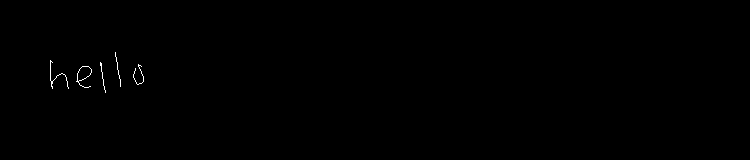

In [ ]:
# target_word = input("Type a sentence to generate : ")
# framenum =0 
amt = 0.3
target_word = "hello"
if len(target_word) > 0:
    if direct_use == 0:
        im = sample(target_word)
    else:
        im = sample2(target_word)

im.convert("RGB")

In [ ]:
# framenum = 0
# for i in range(21):
#     im = sample(target_word)
#     im.convert("RGB").save(f'results/cos_{framenum}.png')

#     framenum += 1


In [ ]:
len(all_W)

5

In [39]:
!git add 

Switched to a new branch 'ui'


commit 99e081b8639af13b9fe74541694febe24dcc8f0b (HEAD -> master, origin/master, origin/HEAD)
Author: brayden-gg <bgoldsteingelb@gmail.com>
Date:   Thu Aug 4 05:11:52 2022 -0400

    set clamp to 0 by defauly

commit 6619dd50b0c40d182f5bce71b31dcd0f58efaf5d
Author: brayden-gg <bgoldsteingelb@gmail.com>
Date:   Tue Aug 2 23:29:41 2022 -0400

    updated google drive for model

commit b208210d76cfb2a6931a02b31de7fbc9ca799c26
Author: brayden-gg <bgoldsteingelb@gmail.com>
Date:   Tue Aug 2 15:29:32 2022 -0400

    clarifying arguments

commit 6efbf9eef00123a3876a07450fd0f8f01183763f
Author: brayden-gg <bgoldsteingelb@gmail.com>
Date:   Tue Aug 2 14:43:10 2022 -0400

    fixed grid order and picked better example

commit fe3986e70524c78e4cb0fd341d6ef723775683c7
Author: brayden-gg <bgoldsteingelb@gmail.com>
Date:   Fri Jul 29 04:10:40 2022 -0400

    clarification about argument

commit 6583460596c209cfde8376bd9e6b080348af503f
Author: brayden-gg <bgoldsteingelb@gmail.com>
Date:   Fri Jul 29 0